In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [29]:
data=pd.read_csv('https://raw.githubusercontent.com/omgo101/dataset-project/main/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [30]:
#eda and visualization
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


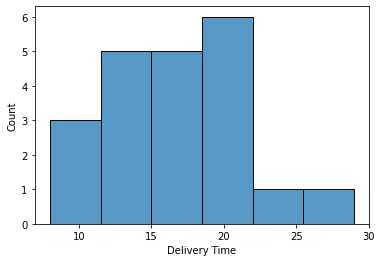

In [31]:
sns.histplot(data['Delivery Time'])

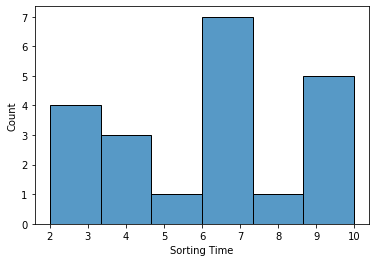

In [32]:
sns.histplot(data['Sorting Time'])

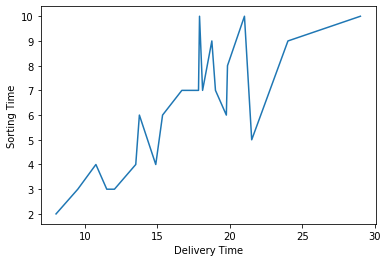

In [46]:
sns.lineplot(data=data,x="Delivery Time", y="Sorting Time")

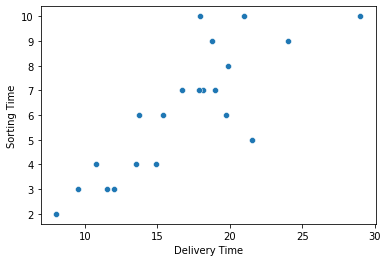

In [47]:
sns.scatterplot(data=data,x="Delivery Time", y="Sorting Time")

In [34]:
# Feature Engineering
data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [35]:
#Correlation Analysis
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


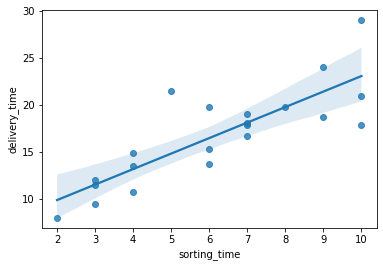

In [36]:
sns.regplot(x=data1['sorting_time'],y=data1['delivery_time'])

In [37]:
model=smf.ols("delivery_time~sorting_time",data=data1).fit()

In [38]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [40]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [49]:
# Manual prediction for say sorting time 10
delivery_time = (6.582734) + (1.649020)*(10)
delivery_time

23.072933999999997

In [42]:
#prediction for 10,6
new_data=pd.Series([10,6])
new_data

0    10
1     6
dtype: int64

In [43]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,10
1,6


In [44]:
model.predict(data_pred)

0    23.072933
1    16.476853
dtype: float64